# 02.Python 基礎與應用

## 1. Jupyter Notebook使用打底

Jupyter Notebook是目前資料分析的主流平台，主要可使用Python，其他如R語言也有支援，有些指令要先瞭解會更好用。
- 首先知道執行除了按"RUN"，更常用的是"shift+enter"
- 魔術指令
    - %CD 如系統的cd切換路徑
    - %timeit 將試跑N次該格程式碼，計算平均執行時間
    - %matplotlib inline 圖會直接顯示在網頁裡面(預設matplotlib圖會另開視窗)
- 系統指令
    - !pwd 系統路徑
    - !pip3 install 套件名稱 #如同在終端機視窗下達指令，只要你加了驚嘆號

In [1]:
!pwd

/home/nbuser/library/lesson


### 1. Jupyter Notebook畫圖兩三事


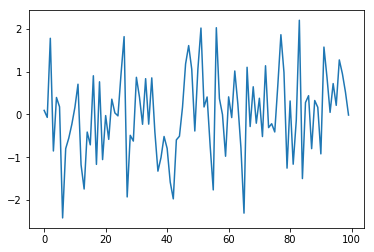

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(np.random.randn(100))

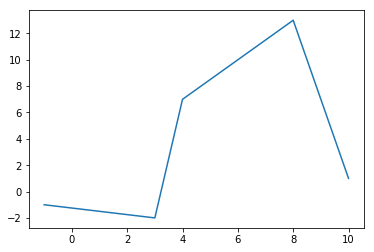

In [3]:
x = [-1, 3, 4, 8 , 10]
f = [-1, -2, 7, 13 , 1]
plt.plot(x, f)
plt.show()

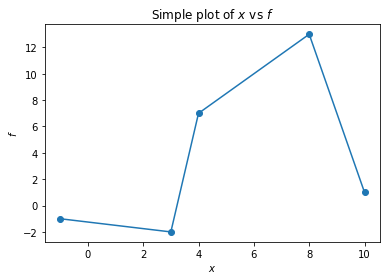

In [4]:
# Plot data with a line and dots at the data points (this is what '-o' does)
plt.plot(x, f, '-o')  

# Attach labels and title (using LaTeX syntax)
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.title("Simple plot of $x$ vs $f$")
plt.show()

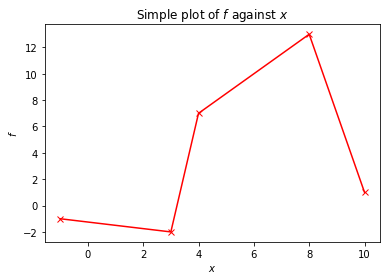

In [5]:
# Plot data with a red solid line and crosses at the data points (this is what '-xr' does)
plt.plot(x, f, '-xr')

# Attach labels and title
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.title("Simple plot of $f$ against $x$")

# Save plot to file
plt.savefig("my-plot.pdf")
plt.show()

### 2. Bar charts

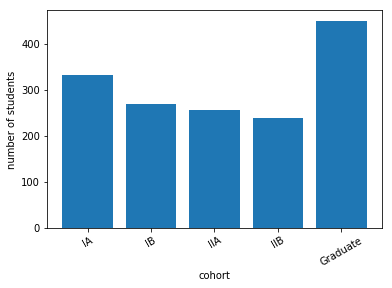

In [6]:
cohort = ('IA', 'IB', 'IIA', 'IIB', 'Graduate')
num_students = (332, 270, 256, 238, 451)

# Create an array with the position of each bar along the x-axis, e.g [0, 1, 2, 3, 4] 
x_pos = np.arange(len(cohort))

# Produce bar plot
plt.bar(x_pos, num_students, align='center');

# Replace the x ticks with the Tripos name, and rotate labels 30 degrees
plt.xticks(x_pos, cohort, rotation=30)

# Add axis labels 
plt.xlabel('cohort')
plt.ylabel('number of students')

plt.show()


### 3.Histograms

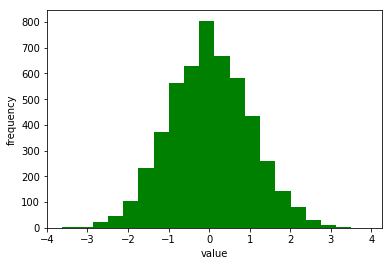

In [7]:
# loc=mean, scale=stddev, size=num samples
x = np.random.normal(loc=0.0, scale=1.0, size=5000)  

# Produce histogram with 20 bins (try changing the number of bins)
n, bins, patches = plt.hist(x, 20, facecolor='green');

# Add label
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


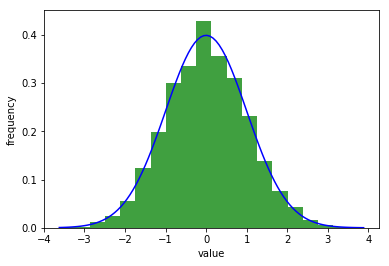

In [8]:
# Import norm from SciPy stats module to compute norm probability distribution function
from scipy.stats import norm

# Plot normed histogram of data
n, bins, patches = plt.hist(x, 20, normed=1.0, facecolor='green', alpha=0.75);

# Create array of 100 equally spaces points, stating from the first value in the bins
# through to the last values in the bins
xf = np.linspace(bins[0], bins[-1], 100)

# Evaluate normal probability density function (pdf) at each xf
f = norm.pdf(xf)

# Create line plot of normal probability distribution function (blue line)
plt.plot(xf, f, 'b')

# Add labels
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

### 4. Pie charts

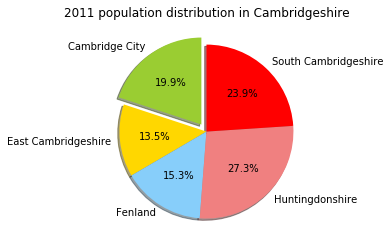

In [9]:
district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)

# Specify slice colours 
# (see http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

# "explode" the 1st slice (Cambridge City)
explode = (0.1, 0.0, 0, 0, 0)  

# Produce pie chart. The slices will be ordered and plotted counter-clockwise.
plt.pie(population, explode=explode, labels=district, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Add title
plt.title("2011 population distribution in Cambridgeshire")

plt.show()

### 5. Three-dimensional plot (optional)

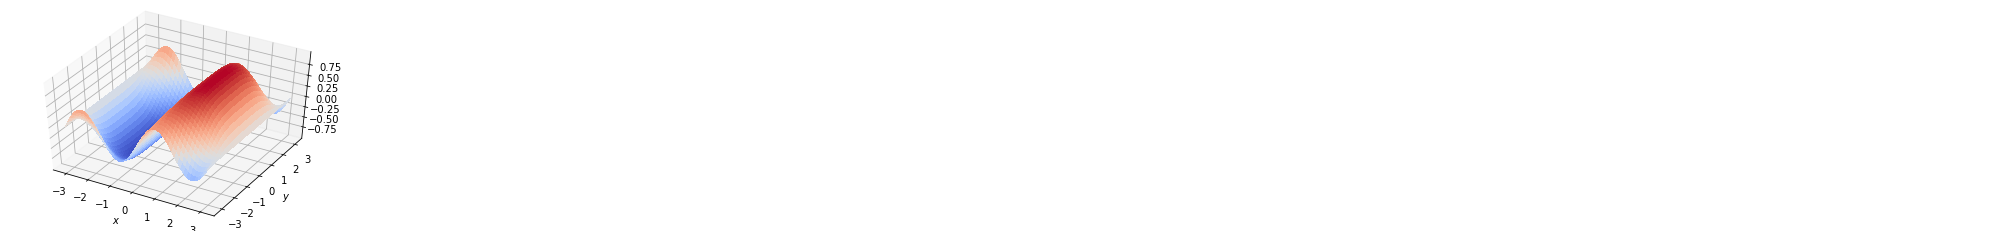

In [10]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

N = 50  # 50 points in each direction
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)
X, Y = np.meshgrid(x, y)
f = np.sin(X)*np.cos((X*Y**2)/10)


surf = ax.plot_surface(X, Y, f, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
                                              
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.view_init(elev=45)

plt.show()

#  2. 使用Python的Pandas

Python的套件Pandas，是使用Python進行資料科學非常重要的套件，熟悉後如同使用EXCEL方便，可進行輸入、整理、分析、輸出資料等主要任務。

利用Pandas，我們可以分析time series，Pandas有兩種主要的資料結構：
* Series：一條時間序列
* DataFrame：很多的時間序列

我們直接嘗試使用DataFrame格式吧

In [11]:
import pandas as pd

餐名 = ["一號餐", "二號餐", "三號餐", "四號餐", "五號餐"]
價錢 = [60, 70, 80, 90, 100]

豆豆屋訂餐_dict = {"餐名":餐名,"價錢":價錢}

豆豆屋訂餐_df = pd.DataFrame(豆豆屋訂餐_dict)

豆豆屋訂餐_df

,價錢,餐名
0,60,一號餐
1,70,二號餐
2,80,三號餐
3,90,四號餐
4,100,五號餐


In [12]:
# 使用屬性

print(豆豆屋訂餐_df.ndim)
print("--我是分格線--"*5)
print(豆豆屋訂餐_df.shape)
print("--我是分格線--"*5)
print(豆豆屋訂餐_df.dtypes)


2
--我是分格線----我是分格線----我是分格線----我是分格線----我是分格線--
(5, 2)
--我是分格線----我是分格線----我是分格線----我是分格線----我是分格線--
價錢     int64
餐名    object
dtype: object


In [13]:
# 刪除觀測值
豆豆屋訂餐_df_no_mw = 豆豆屋訂餐_df.drop(0, axis = 0)
print(豆豆屋訂餐_df_no_mw)
print("---") # 分隔線

# 刪除欄位
豆豆屋訂餐_no_groups = 豆豆屋訂餐_df.drop("價錢", axis = 1)
print(豆豆屋訂餐_no_groups)

    價錢   餐名
1   70  二號餐
2   80  三號餐
3   90  四號餐
4  100  五號餐
---
    餐名
0  一號餐
1  二號餐
2  三號餐
3  四號餐
4  五號餐


In [14]:
#透過 ix 屬性篩選 data frame
#我們可以透過 ix 屬性（利用索引值）篩選 data frame。
# 選擇欄位
print(豆豆屋訂餐_df.ix[:, "餐名"])
print("---"*10) # 分隔線

# 選擇觀測值
print(豆豆屋訂餐_df.ix[0])
print("---"*10) # 分隔線

# 同時選擇欄位與觀測值
print(豆豆屋訂餐_df.ix[0, "餐名"])

0    一號餐
1    二號餐
2    三號餐
3    四號餐
4    五號餐
Name: 餐名, dtype: object
------------------------------
價錢     60
餐名    一號餐
Name: 0, dtype: object
------------------------------
一號餐


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [15]:
#透過布林值篩選 data frame
filter = 豆豆屋訂餐_df["價錢"] > 60 
豆豆屋訂餐_df[filter] # 篩選 data frame

,價錢,餐名
1,70,二號餐
2,80,三號餐
3,90,四號餐
4,100,五號餐


排序
- sort_index() 方法
- sort_values() 方法
- 使用 data frame 的 sort_index() 方法可以用索引值排序。

In [16]:
# 用索引值排序
豆豆屋訂餐_df.sort_index()

,價錢,餐名
0,60,一號餐
1,70,二號餐
2,80,三號餐
3,90,四號餐
4,100,五號餐


In [17]:
# 用數值排序
豆豆屋訂餐_df.sort_values(by = "餐名")

,價錢,餐名
0,60,一號餐
2,80,三號餐
1,70,二號餐
4,100,五號餐
3,90,四號餐


### 描述統計
data frame 有 sum()、mean()、median() 與 describe() 等統計方法可以使用。

In [18]:
print(豆豆屋訂餐_df.sum()) # 計算總鐵人數
print("---") # 分隔線
print(豆豆屋訂餐_df.mean()) # 計算平均鐵人數
print("---") # 分隔線
print(豆豆屋訂餐_df.median()) # 計算中位數
print("---") # 分隔線
print(豆豆屋訂餐_df.describe()) # 描述統計

價錢                400
餐名    一號餐二號餐三號餐四號餐五號餐
dtype: object
---
價錢    80.0
dtype: float64
---
價錢    80.0
dtype: float64
---
               價錢
count    5.000000
mean    80.000000
std     15.811388
min     60.000000
25%     70.000000
50%     80.000000
75%     90.000000
max    100.000000


### 相異值個數
透過 pandas 的 value_counts() 方法可以統計相異值的個數。

In [19]:
pd.value_counts(豆豆屋訂餐_df.價錢)
#pd.value_counts(豆豆屋訂餐_df.餐名)

70     1
60     1
90     1
100    1
80     1
Name: 價錢, dtype: int64

### 遺失值
判斷遺失值
- isnull() 方法
- notnull() 方法

In [20]:
import numpy as np
import pandas as pd

groups = ["Modern Web", "DevOps", np.nan, "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, np.nan]

ironmen_dict = {
                "groups": groups,
                "ironmen": ironmen
}

# 建立 data frame
ironmen_df = pd.DataFrame(ironmen_dict)

print(ironmen_df.ix[:, "groups"].isnull()) # 判斷哪些組的組名是遺失值
print("---") # 分隔線
print(ironmen_df.ix[:, "ironmen"].notnull()) # 判斷哪些組的鐵人數不是遺失值

0    False
1    False
2     True
3    False
4    False
5    False
Name: groups, dtype: bool
---
0     True
1     True
2     True
3     True
4     True
5    False
Name: ironmen, dtype: bool


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### 處理遺失值
- dropna() 方法
- fillna() 方法

In [21]:
import numpy as np
import pandas as pd

groups = ["Modern Web", "DevOps", np.nan, "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, np.nan]

ironmen_dict = {
                "groups": groups,
                "ironmen": ironmen
}

# 建立 data frame
ironmen_df = pd.DataFrame(ironmen_dict)

ironmen_df_na_dropped = ironmen_df.dropna() # 有遺失值的觀測值都刪除
print(ironmen_df_na_dropped)
print("---") # 分隔線
ironmen_df_na_filled = ironmen_df.fillna(0) # 有遺失值的觀測值填補 0
print(ironmen_df_na_filled)
print("---") # 分隔線
ironmen_df_na_filled = ironmen_df.fillna({"groups": "Cloud", "ironmen": 71}) # 依欄位填補遺失值
print(ironmen_df_na_filled)

       groups  ironmen
0  Modern Web     59.0
1      DevOps      9.0
3    Big Data     14.0
4    Security      6.0
---
       groups  ironmen
0  Modern Web     59.0
1      DevOps      9.0
2           0     19.0
3    Big Data     14.0
4    Security      6.0
5       自我挑戰組      0.0
---
       groups  ironmen
0  Modern Web     59.0
1      DevOps      9.0
2       Cloud     19.0
3    Big Data     14.0
4    Security      6.0
5       自我挑戰組     71.0


##### 參考來源
- https://ithelp.ithome.com.tw/articles/10185922